In [2]:
## 사용할 모듈 미리 로딩
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib as mpl
from bs4 import BeautifulSoup
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
import time
import platform
import numpy as np
import random
import os
import shutil
from PIL import Image
import collections
if not hasattr(collections, 'Callable'):
    collections.Callable = collections.abc.Callable

from sqlalchemy.sql import text as Text
from sqlalchemy import create_engine
from sqlalchemy import engine


import scipy
import scipy.integrate


In [3]:

sqlinfo = engine.URL.create(
    drivername='mysql+pymysql',
    username = 'KMS',
    password = '1234Q1@',
    database = 'numpyproject',
    query = {'charset':'utf8mb4'},
    host = "114.201.240.47",
    port = 33063,
)

conn = create_engine(sqlinfo,connect_args={'ssl':{"fake_flag_to_enable_tls":True}})

In [4]:
# 폰트 설정 나눔고딕
mpl.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus']=False

In [5]:
tables = {}

for file in os.listdir('files'):
    if file.find('기온') < 0:
        tables[file.split('.')[0]] = pd.read_csv('files/'+file, encoding='euc-kr', index_col=None, skiprows=range(5)).iloc[4:120, :-2]
    elif file.find('기온') >= 0:
        tables[file.split('.')[0]] = pd.read_csv('files/'+file, encoding='euc-kr', index_col=None, parse_dates=[2], date_format='%Y-%m')

In [6]:
for name, table in tables.items():
    if name.find('기온') < 0:
        tables[name][tables[name].columns[1:]] = table[table.columns[1:]].apply(lambda x: pd.to_numeric(x), axis=0)
        tables[name]['연도'] = tables[name]['연도'].astype('uint16')
    elif name.find('기온') >= 0:
        tables[name][tables[name].columns[3:]] = table[table.columns[3:]].apply(lambda x: pd.to_numeric(x), axis=0)

In [7]:
tables['결빙일수'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 4 to 119
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      116 non-null    uint16 
 1   1월      116 non-null    float64
 2   2월      116 non-null    float64
 3   3월      116 non-null    float64
 4   4월      116 non-null    float64
 5   5월      116 non-null    float64
 6   6월      116 non-null    float64
 7   7월      116 non-null    float64
 8   8월      116 non-null    float64
 9   9월      116 non-null    float64
 10  10월     116 non-null    float64
 11  11월     116 non-null    float64
 12  12월     116 non-null    float64
dtypes: float64(12), uint16(1)
memory usage: 11.2 KB


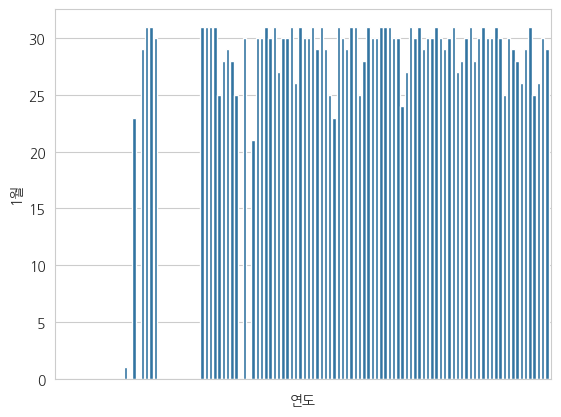

In [8]:
facet = sns.barplot(data=tables['결빙일수'], x ='연도', y ='1월')
# ax.set(xlabel=None)
facet.set_xticks(["" for _ in facet.get_xticks()])


In [9]:
tables['결빙일수'][tables['결빙일수']['1월'] > 10].iloc[:, 1:].mean()

1월     29.117647
2월     24.682353
3월     15.682353
4월      1.764706
5월      0.000000
6월      0.000000
7월      0.000000
8월      0.011765
9월      0.000000
10월     1.388235
11월    11.964706
12월    25.800000
dtype: float64

In [10]:
tables['결빙일수'][tables['결빙일수']['1월'] > 10].iloc[:, 1:].mean()

1월     29.117647
2월     24.682353
3월     15.682353
4월      1.764706
5월      0.000000
6월      0.000000
7월      0.000000
8월      0.011765
9월      0.000000
10월     1.388235
11월    11.964706
12월    25.800000
dtype: float64

In [11]:
tables['결빙일수'][tables['결빙일수']['1월'] > 10].iloc[:, 1:].std()

1월     2.275186
2월     3.270400
3월     5.370137
4월     1.997898
5월     0.000000
6월     0.000000
7월     0.000000
8월     0.108465
9월     0.000000
10월    1.793468
11월    5.366224
12월    5.729622
dtype: float64

In [12]:
tables['결빙일수'][tables['결빙일수']['1월'] > 10].iloc[:, 1:].describe(include='all')

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
count,85.000000,85.000000,85.000000,85.000000,85.0,85.0,85.0,85.000000,85.0,85.000000,85.000000,85.000000
mean,29.117647,24.682353,15.682353,1.764706,0.0,0.0,0.0,0.011765,0.0,1.388235,11.964706,25.800000
std,2.275186,3.270400,5.370137,1.997898,0.0,0.0,0.0,0.108465,0.0,1.793468,5.366224,5.729622
min,21.000000,14.000000,5.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,28.000000,23.000000,12.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,7.000000,24.000000
50%,30.000000,26.000000,16.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,12.000000,27.000000
75%,31.000000,27.000000,19.000000,3.000000,0.0,0.0,0.0,0.000000,0.0,2.000000,16.000000,29.000000
max,31.000000,29.000000,29.000000,8.000000,0.0,0.0,0.0,1.000000,0.0,8.000000,23.000000,31.000000


In [13]:
tables['기온데이터'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   지점          1356 non-null   int64         
 1   지점명         1356 non-null   object        
 2   일시          1356 non-null   datetime64[ns]
 3   평균기온(°C)    1356 non-null   float64       
 4   평균최고기온(°C)  1356 non-null   float64       
 5   평균최저기온(°C)  1356 non-null   float64       
 6   최고기온(°C)    1356 non-null   float64       
 7   최저기온(°C)    1356 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 84.9+ KB


In [14]:
describedf = {}
for name, table in tables.items():
    if name.find('기온') < 0:
        describedf[name] = table[table['1월'] > 0].iloc[:, 1:].describe(include='all')
    # elif name.find('기온') >= 0:
    #     describedf[name] = table[(table['일시'].datetime.month == 1]

In [15]:
tables['기온데이터'][tables['기온데이터']['일시'].dt.month == 1].describe()

,지점,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C)
count,113.0,113,113.000000,113.000000,113.000000,113.000000,113.000000
mean,108.0,1965-11-10 03:49:22.831858400,-3.523009,0.784956,-7.647788,8.368142,-15.523894
min,108.0,1908-01-01 00:00:00,-9.100000,-4.800000,-14.400000,0.300000,-22.500000
25%,108.0,1936-01-01 00:00:00,-4.800000,-0.700000,-9.600000,7.000000,-18.200000
50%,108.0,1967-01-01 00:00:00,-3.500000,0.700000,-7.500000,8.500000,-15.700000
75%,108.0,1995-01-01 00:00:00,-2.100000,2.200000,-5.700000,10.000000,-12.500000
max,108.0,2023-01-01 00:00:00,1.600000,5.900000,-1.700000,14.400000,-6.500000
std,0.0,NaN,2.321061,2.181547,2.790420,2.735979,3.604766


In [16]:
tables_전처리날짜 = {}

for name in ['결빙일수', '서리일수', '우박일수']:
    tmpdf = tables[name].melt(id_vars=['연도'], value_vars=tables[name].columns[1:], var_name='월')
    
    tmpdf['월'] = tmpdf['월'].apply(lambda x : x.replace('월', ''))
    tmpdf['datetime'] = pd.to_datetime(tmpdf['연도'].astype('str') + "년"+
                                       tmpdf['월'].astype('str'),
                                       format='%Y년%m'
                                       )
    # reindex columns
    tmpdf = tmpdf.reindex(columns=['datetime', 'value'])
    
    #rename columns
    tmpdf.columns = ['일시', f'{name}횟수']
    
    tmpdf.sort_values(by='일시', inplace=True)
    tmpdf.reset_index(drop=True, inplace=True)
    tables_전처리날짜[name] = tmpdf


In [17]:
basedf = tables['기온데이터']

for name, tmpdf in tables_전처리날짜.items():
    pd.concat([basedf, tmpdf], axis=1, join ='inner')
    basedf = pd.merge(basedf, tmpdf, on='일시', how='inner')
    

In [18]:
basedf

,지점,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),결빙일수횟수,서리일수횟수,우박일수횟수
0,108,서울,1908-01-01,-3.5,0.1,-7.5,6.2,-14.3,0.0,23.0,4.0
1,108,서울,1908-02-01,-4.0,0.8,-8.8,8.4,-15.8,0.0,13.0,0.0
2,108,서울,1908-03-01,2.9,8.1,-1.7,18.2,-7.4,0.0,21.0,0.0
3,108,서울,1908-04-01,10.1,16.5,4.6,22.9,-0.7,0.0,4.0,0.0
4,108,서울,1908-05-01,14.9,21.1,10.0,25.2,5.2,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1348,108,서울,2023-08-01,27.2,30.8,24.3,35.8,20.8,0.0,0.0,0.0
1349,108,서울,2023-09-01,23.7,27.6,20.2,32.8,15.2,0.0,0.0,0.0
1350,108,서울,2023-10-01,15.8,21.0,11.5,24.6,5.4,0.0,0.0,1.0
1351,108,서울,2023-11-01,6.8,11.5,2.9,25.9,-7.3,19.0,15.0,0.0


In [19]:
basedf['월'] = basedf['일시'].dt.month
basedf['년'] = basedf['일시'].dt.year

In [20]:
basedf.to_sql('날씨', con=conn, if_exists='replace', index=False)

1353

In [21]:
basedf.groupby(['월']).std(numeric_only=True).corr()

,지점,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),결빙일수횟수,서리일수횟수,우박일수횟수,년
지점,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
평균기온(°C),NaN,1.000000,0.939577,0.957974,0.921897,0.898336,0.978785,0.958837,0.940914,-0.282864
평균최고기온(°C),NaN,0.939577,1.000000,0.815462,0.927098,0.732315,0.910346,0.886555,0.819952,-0.463600
평균최저기온(°C),NaN,0.957974,0.815462,1.000000,0.840068,0.968882,0.962177,0.949164,0.942138,-0.070947
최고기온(°C),NaN,0.921897,0.927098,0.840068,1.000000,0.746635,0.877317,0.863979,0.805511,-0.397959
최저기온(°C),NaN,0.898336,0.732315,0.968882,0.746635,1.000000,0.935594,0.898894,0.895068,-0.018567
결빙일수횟수,NaN,0.978785,0.910346,0.962177,0.877317,0.935594,1.000000,0.966257,0.945943,-0.221158
서리일수횟수,NaN,0.958837,0.886555,0.949164,0.863979,0.898894,0.966257,1.000000,0.959729,-0.094487
우박일수횟수,NaN,0.940914,0.819952,0.942138,0.805511,0.895068,0.945943,0.959729,1.000000,-0.073008
년,NaN,-0.282864,-0.463600,-0.070947,-0.397959,-0.018567,-0.221158,-0.094487,-0.073008,1.000000


In [22]:
basedf.groupby(['년']).mean(numeric_only=True)

,지점,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),결빙일수횟수,서리일수횟수,우박일수횟수,월
년,,,,,,,,,,
1908,108.0,10.383333,15.725000,5.758333,22.033333,-0.375000,0.000000,9.416667,0.666667,6.5
1909,108.0,10.550000,15.950000,5.758333,22.591667,0.225000,0.000000,10.250000,0.833333,6.5
1910,108.0,10.341667,15.925000,5.683333,21.600000,-1.058333,0.083333,8.416667,1.083333,6.5
1911,108.0,10.591667,15.941667,5.975000,22.625000,0.241667,0.000000,6.583333,0.833333,6.5
1912,108.0,10.108333,15.616667,5.075000,22.383333,-0.508333,0.000000,8.000000,0.916667,6.5
...,...,...,...,...,...,...,...,...,...,...
2019,108.0,13.525000,18.516667,9.250000,25.133333,3.450000,8.583333,4.833333,0.250000,6.5
2020,108.0,13.233333,17.850000,9.366667,24.100000,3.650000,7.750000,6.083333,0.083333,6.5
2021,108.0,13.700000,18.450000,9.566667,25.725000,2.425000,7.833333,4.166667,0.000000,6.5


In [23]:
basedfyearsum = basedf.groupby(['년']).sum(numeric_only=True).reset_index()
basedfmonthmean = basedf.groupby(['월']).mean(numeric_only=True)

In [24]:
# 횟수가 0인 경우에는 측정이 되지 않을 수 있음
# 

basedfyearsum[basedfyearsum['결빙일수횟수'] > 0 ]

,년,지점,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),결빙일수횟수,서리일수횟수,우박일수횟수,월
2,1910,1296,124.1,191.1,68.2,259.2,-12.7,1.0,101.0,13.0,78
13,1921,1296,130.9,196.8,73.5,274.7,2.0,1.0,20.0,14.0,78
15,1923,1296,127.6,190.5,68.9,263.3,-12.3,1.0,104.0,10.0,78
16,1924,1296,132.3,199.7,69.9,284.5,-7.1,2.0,126.0,11.0,78
17,1925,1296,128.6,191.3,69.4,262.5,-11.3,44.0,100.0,13.0,78
...,...,...,...,...,...,...,...,...,...,...,...
109,2019,1296,162.3,222.2,111.0,301.6,41.4,103.0,58.0,3.0,78
110,2020,1296,158.8,214.2,112.4,289.2,43.8,93.0,73.0,1.0,78
111,2021,1296,164.4,221.4,114.8,308.7,29.1,94.0,50.0,0.0,78
112,2022,1296,158.8,216.1,110.2,292.9,33.1,105.0,85.0,0.0,78


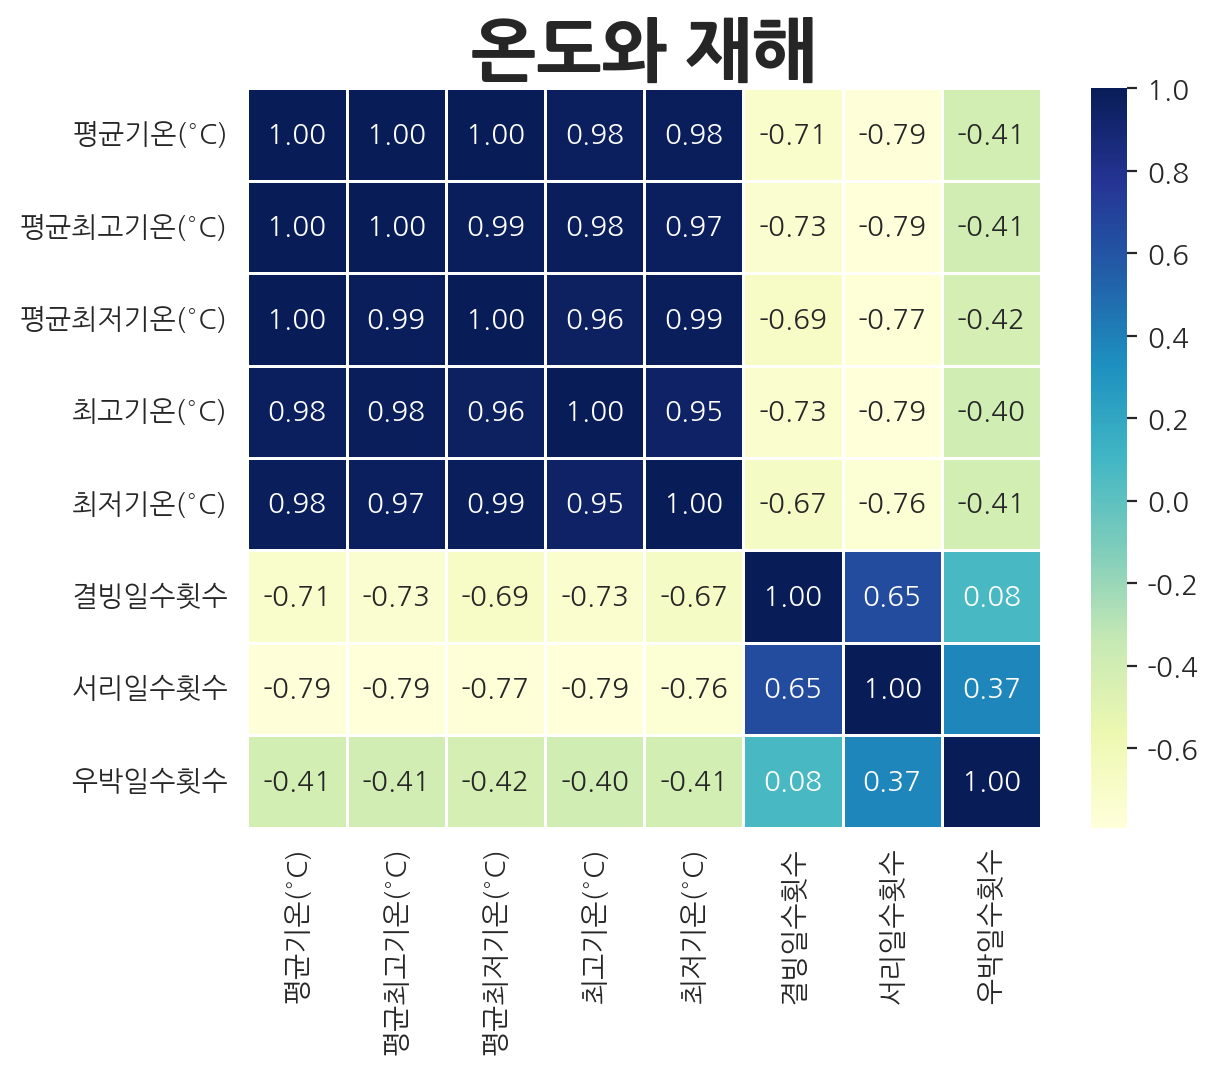

In [97]:
basedf['지점'] = basedf['지점'].astype("str")
basedf['월'] = basedf['월'].astype("str")
basedf['년'] = basedf['년'].astype("str")
plt.figure(dpi = 200)
axe = sns.heatmap(basedf.corr(numeric_only=True), annot=True, fmt = '.2f', linewidths=.5, cmap='YlGnBu')
axe.set_title("온도와 재해", fontsize=25, fontweight='bold')
plt.savefig('분포.png', dpi=200)

Text(0.5, 1.0, '결빙일수횟수')

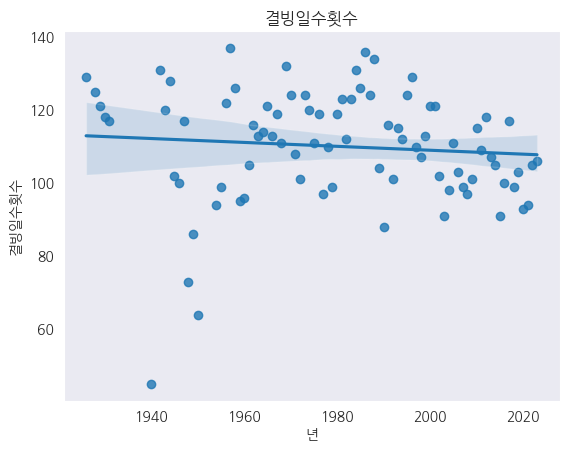

In [85]:

sns.regplot(data=basedfyearsum[basedfyearsum['결빙일수횟수'] >= np.percentile(basedfyearsum['결빙일수횟수'], 25)], x='년', y='결빙일수횟수')
plt.title('결빙일수횟수')


Text(0.5, 1.0, '서리일수횟수')

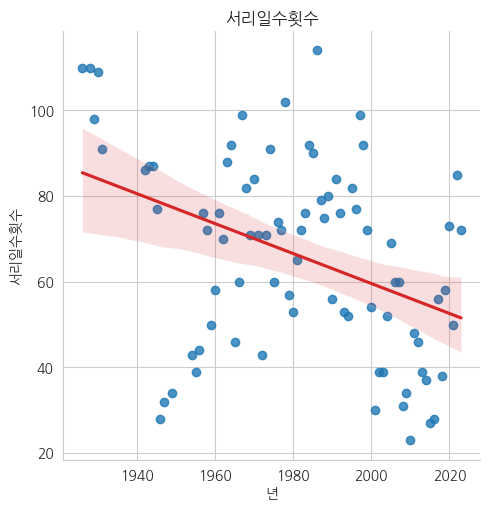

In [26]:
sns.lmplot(
    data=basedfyearsum[basedfyearsum['결빙일수횟수'] >= 80], 
    x='년', 
    y='서리일수횟수', 
    # hue = '월',
    # x_estimator=np.mean,
    line_kws={"color": "C3"},
)

plt.title('서리일수횟수')

('0.0x + 28.602 ', 0.196, 0.072)
('-0.004x + 32.626 ', 0.105, 0.339)
('-0.075x + 164.154 ', -0.324, 0.002)
('0.0x + 1.801 ', 0.003, 0.982)
('-0.02x + 52.052 ', -0.031, 0.779)
('-0.003x + 32.231 ', 0.068, 0.526)


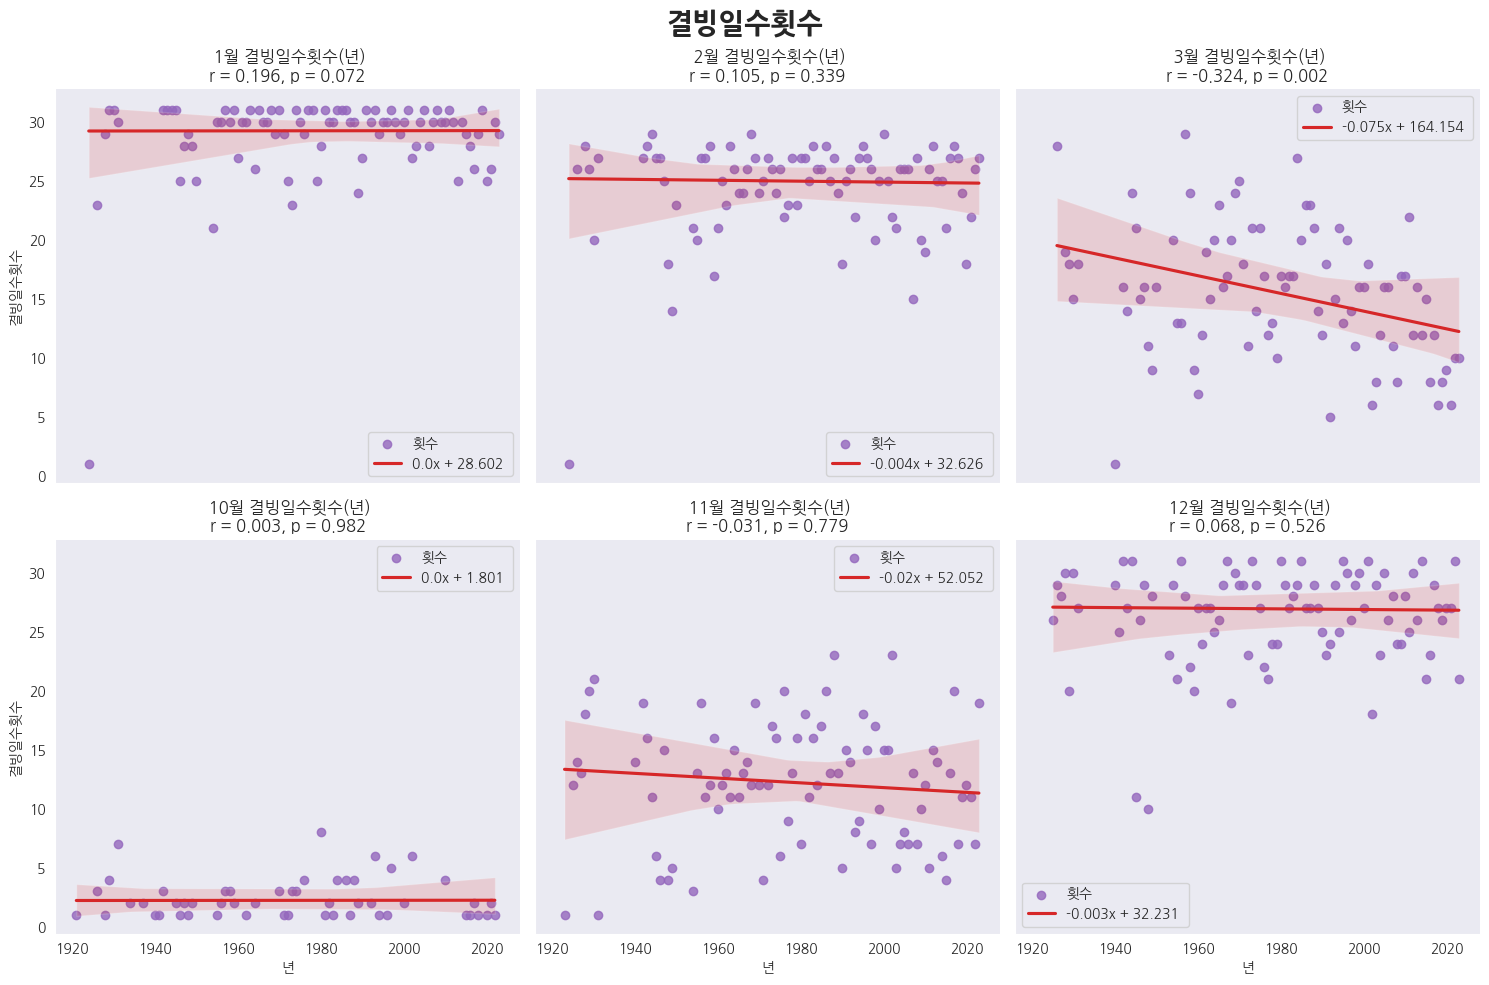

('-0.065x + 143.197 ', -0.268, 0.005)
('-0.059x + 129.626 ', -0.327, 0.001)
('-0.088x + 183.273 ', -0.516, 0.0)
('-0.033x + 67.862 ', -0.465, 0.0)
('-0.065x + 138.012 ', -0.385, 0.0)
('-0.064x + 140.694 ', -0.267, 0.005)


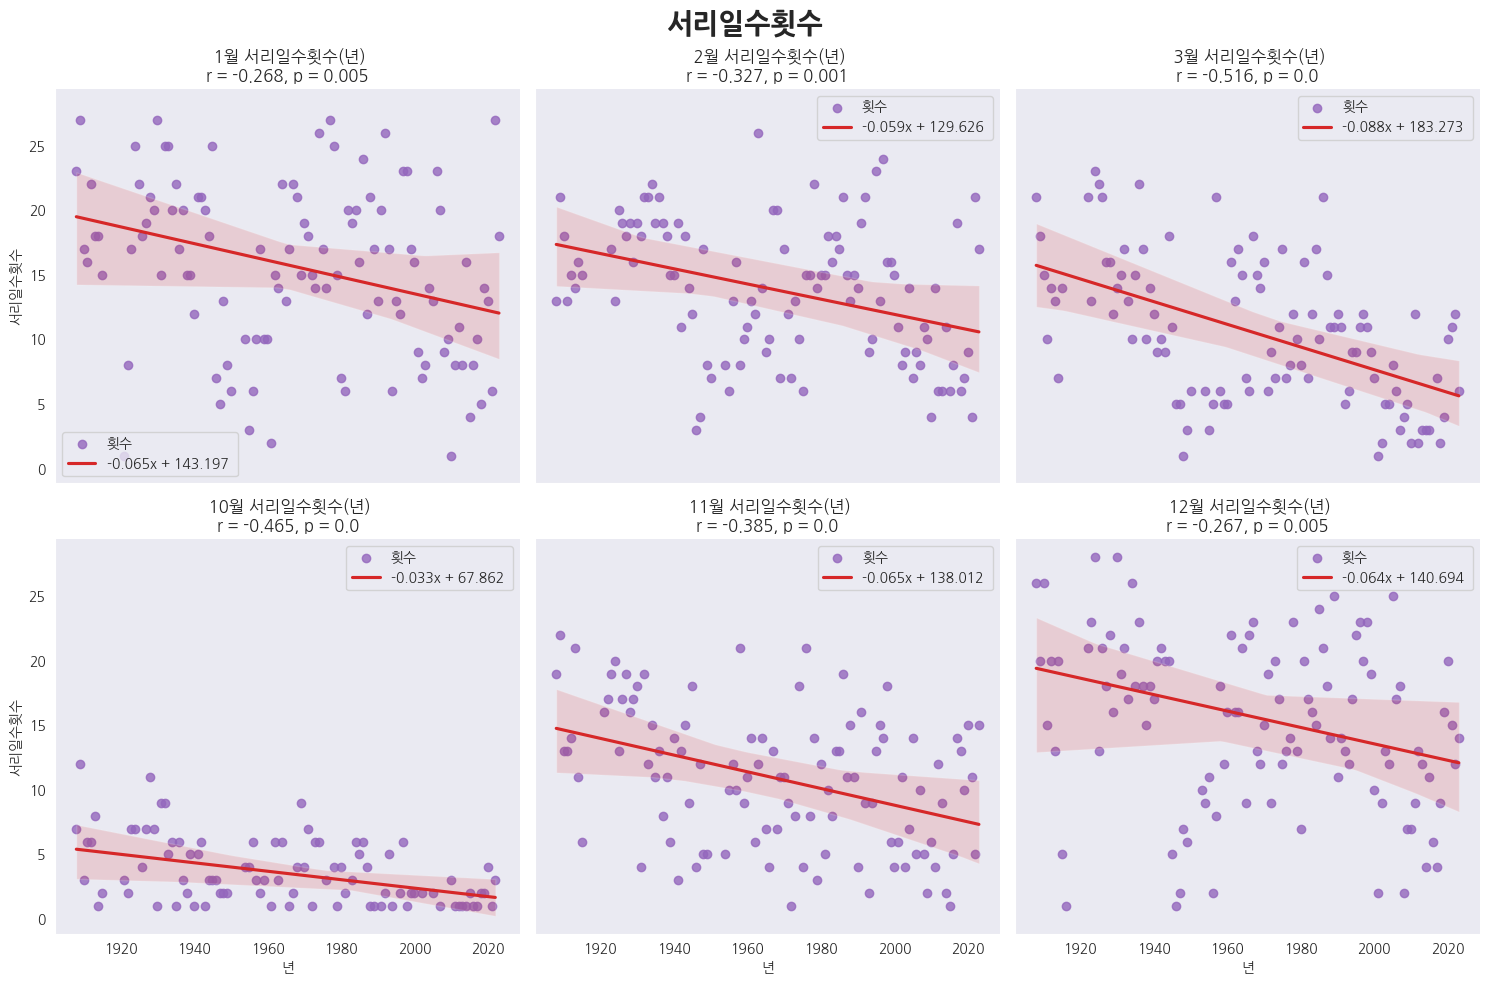

C:\Users\Administrator\PycharmProjects\MathProject\.venv\Lib\site-packages\statsmodels\robust\robust_linear_model.py:288: ConvergenceWarning: Estimated scale is 0.0 indicating that the most last iteration produced a perfect fit of the weighted data.
  warnings.warn('Estimated scale is 0.0 indicating that the most'
C:\Users\Administrator\PycharmProjects\MathProject\.venv\Lib\site-packages\statsmodels\robust\robust_linear_model.py:288: ConvergenceWarning: Estimated scale is 0.0 indicating that the most last iteration produced a perfect fit of the weighted data.
  warnings.warn('Estimated scale is 0.0 indicating that the most'
C:\Users\Administrator\PycharmProjects\MathProject\.venv\Lib\site-packages\statsmodels\robust\robust_linear_model.py:288: ConvergenceWarning: Estimated scale is 0.0 indicating that the most last iteration produced a perfect fit of the weighted data.
  warnings.warn('Estimated scale is 0.0 indicating that the most'
C:\Users\Administrator\PycharmProjects\MathProject\.

('-0.009x + 19.222 ', -0.172, 0.264)
('-0.011x + 23.914 ', -0.345, 0.022)
('-0.002x + 5.846 ', -0.082, 0.592)
('0.0x + 1.0 ', 0.376, 0.185)
('0.0x + 1.0 ', 0.0, 1.0)
('-0.0x + 1.0 ', -0.332, 0.246)
('-0.013x + 26.395 ', -0.443, 0.001)
('-0.015x + 30.313 ', -0.377, 0.006)


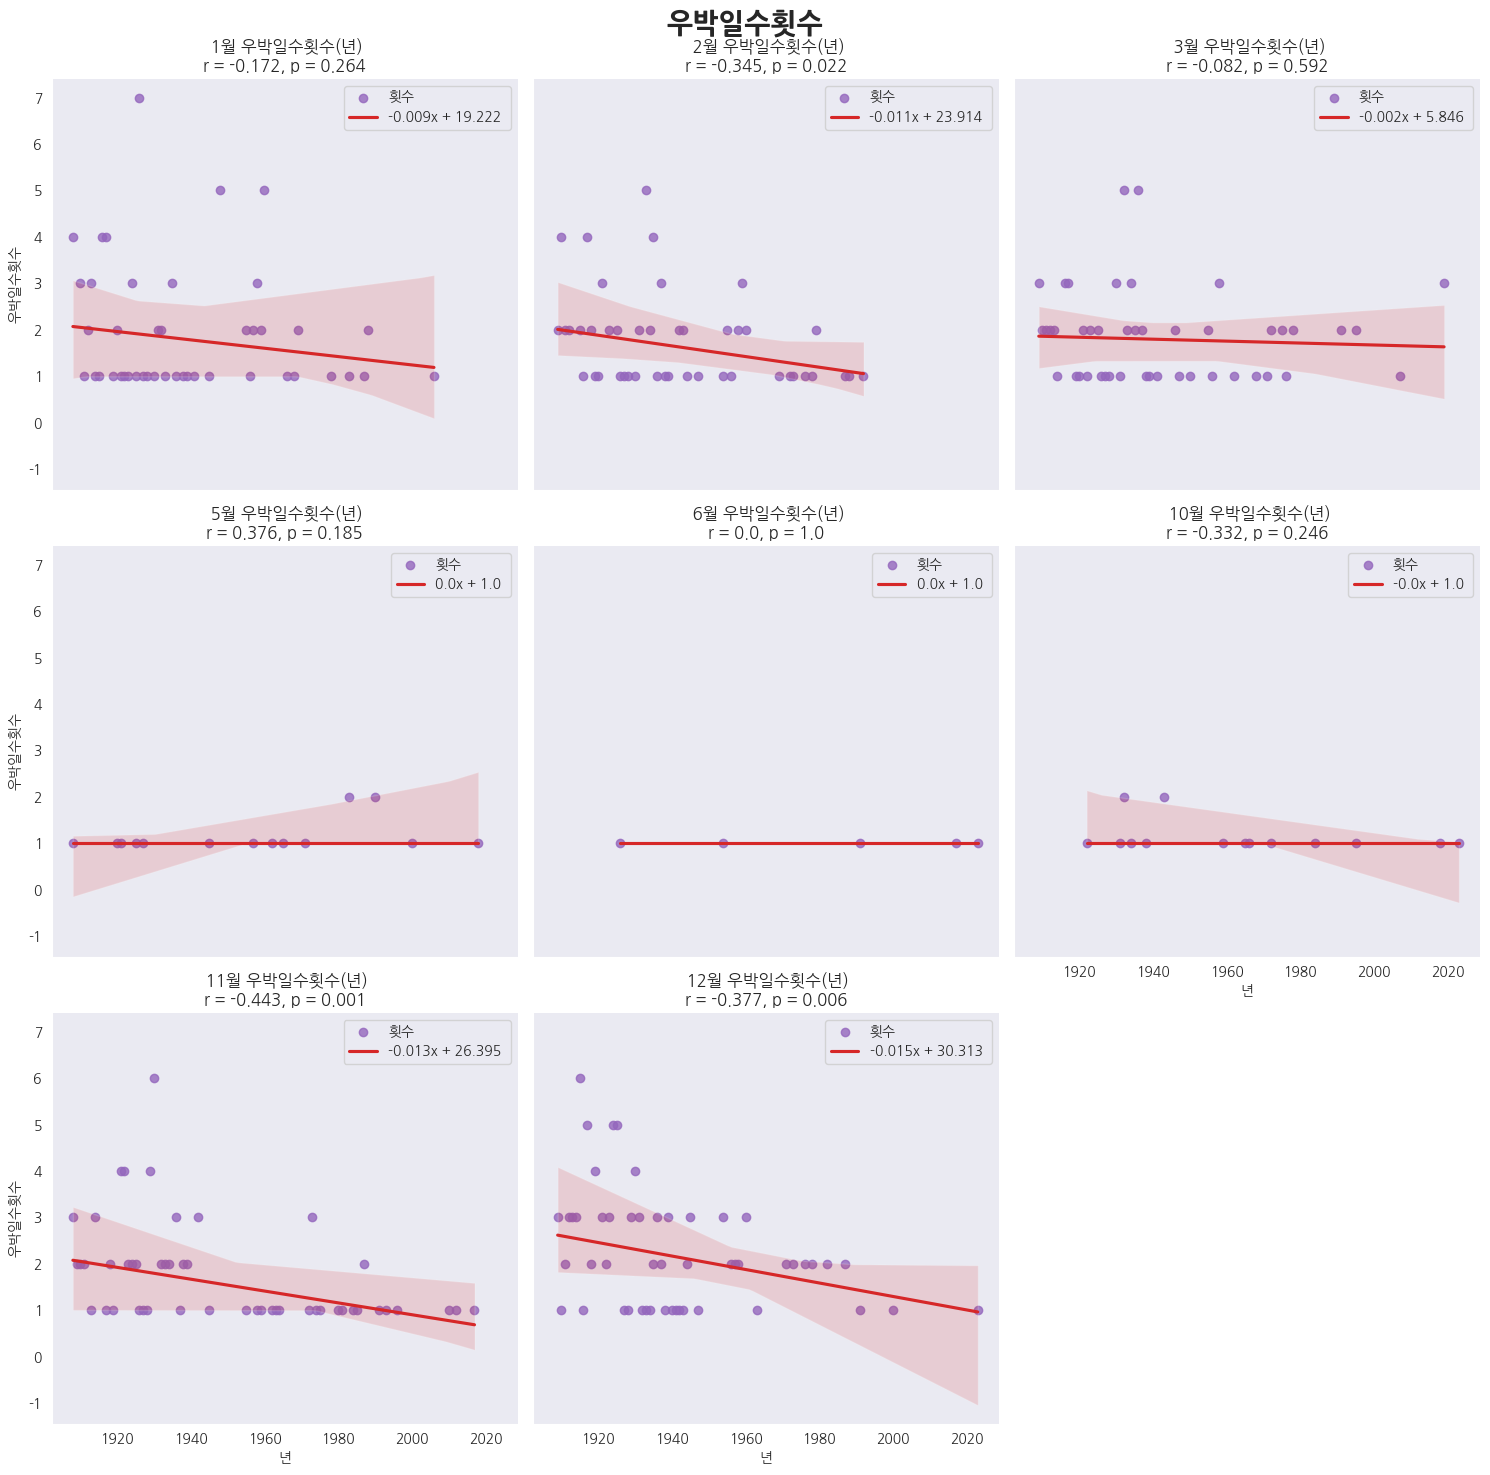

In [86]:
# 날시가 점점 따뜻해질수록 결빙일수 감소의 폭이 증가하는 것을 확인해볼 수 있다.
# 횟수가 포함된 3개의 데이터 리스트
import statsmodels
def interpret_line(axx, xdata, ydata):
    if len(axx.get_lines()) > 0:
        slope, intercept, r, p, sterr = scipy.stats.linregress(
                x=axx.get_lines()[0].get_xdata(),
                y=axx.get_lines()[0].get_ydata()
            )
        rslope, rintercept, rr, rp, rsterr = scipy.stats.linregress(
                x=xdata, y=ydata
        )
        # print(intercept, slope)
        
        calcresult = list(map(lambda x: round(x, 3), [intercept, slope, rr, rp]))
        # print(*calcresult[2:])
        return "{}x + {} ".format(*calcresult[1::-1]), *calcresult[2:]
    else:
        return "없음"
    

sns.color_palette("rocket", as_cmap=True)
sns.set_style("dark")
mpl.rc('font', family='NanumGothic')

for target in [
    '결빙일수횟수', 
    '서리일수횟수', 
    '우박일수횟수',
]:
    refineddf = basedf[
            (basedf[target] > np.percentile(basedf[target], 25)
             ) & 
            (basedf[target] > 0) &
            ~(basedf['월'].isin([4, 8, 9]))]
    # sns.set_theme()0
    facet = sns.lmplot(
        data=refineddf,
        x='년', 
        y=target, 
        col="월",
        line_kws={"color": "C3"},
        scatter_kws={'color': 'C4'},
        col_wrap = 3,
        ci = 100,
        order = 1,
        robust=True,
    )

    facet.fig.subplots_adjust(top=0.95)
    facet.fig.suptitle(f'{target}', fontsize=20, fontweight='bold')
    
    
    for x in facet.facet_data():
        tmpax = facet.facet_axis(0, x[0][1])
        tmpdf = refineddf[refineddf['월'] == int(tmpax.get_title().split('=')[-1])]
        formula = interpret_line(tmpax, tmpdf['년'], tmpdf[target])
        print(formula)
        tmpax.set_title(tmpax.get_title().split('=')[-1] + "월 " + f'{target}(년)\n'
                                                                  f'r = {formula[1]}, p = {formula[2]}')
        # tmpax.set_xlabel(f"r = {formula[1]}, p = {formula[2]}")
        tmpax.legend(['횟수', formula[0]])
        # result = ax.facet_axis(*x)
        # print(result)
    plt.tight_layout()
    plt.savefig(target + '년횟수비교' + '.png', dpi=200)
    plt.show()
    


In [28]:
np.percentile(basedf[target], 80)

1.0

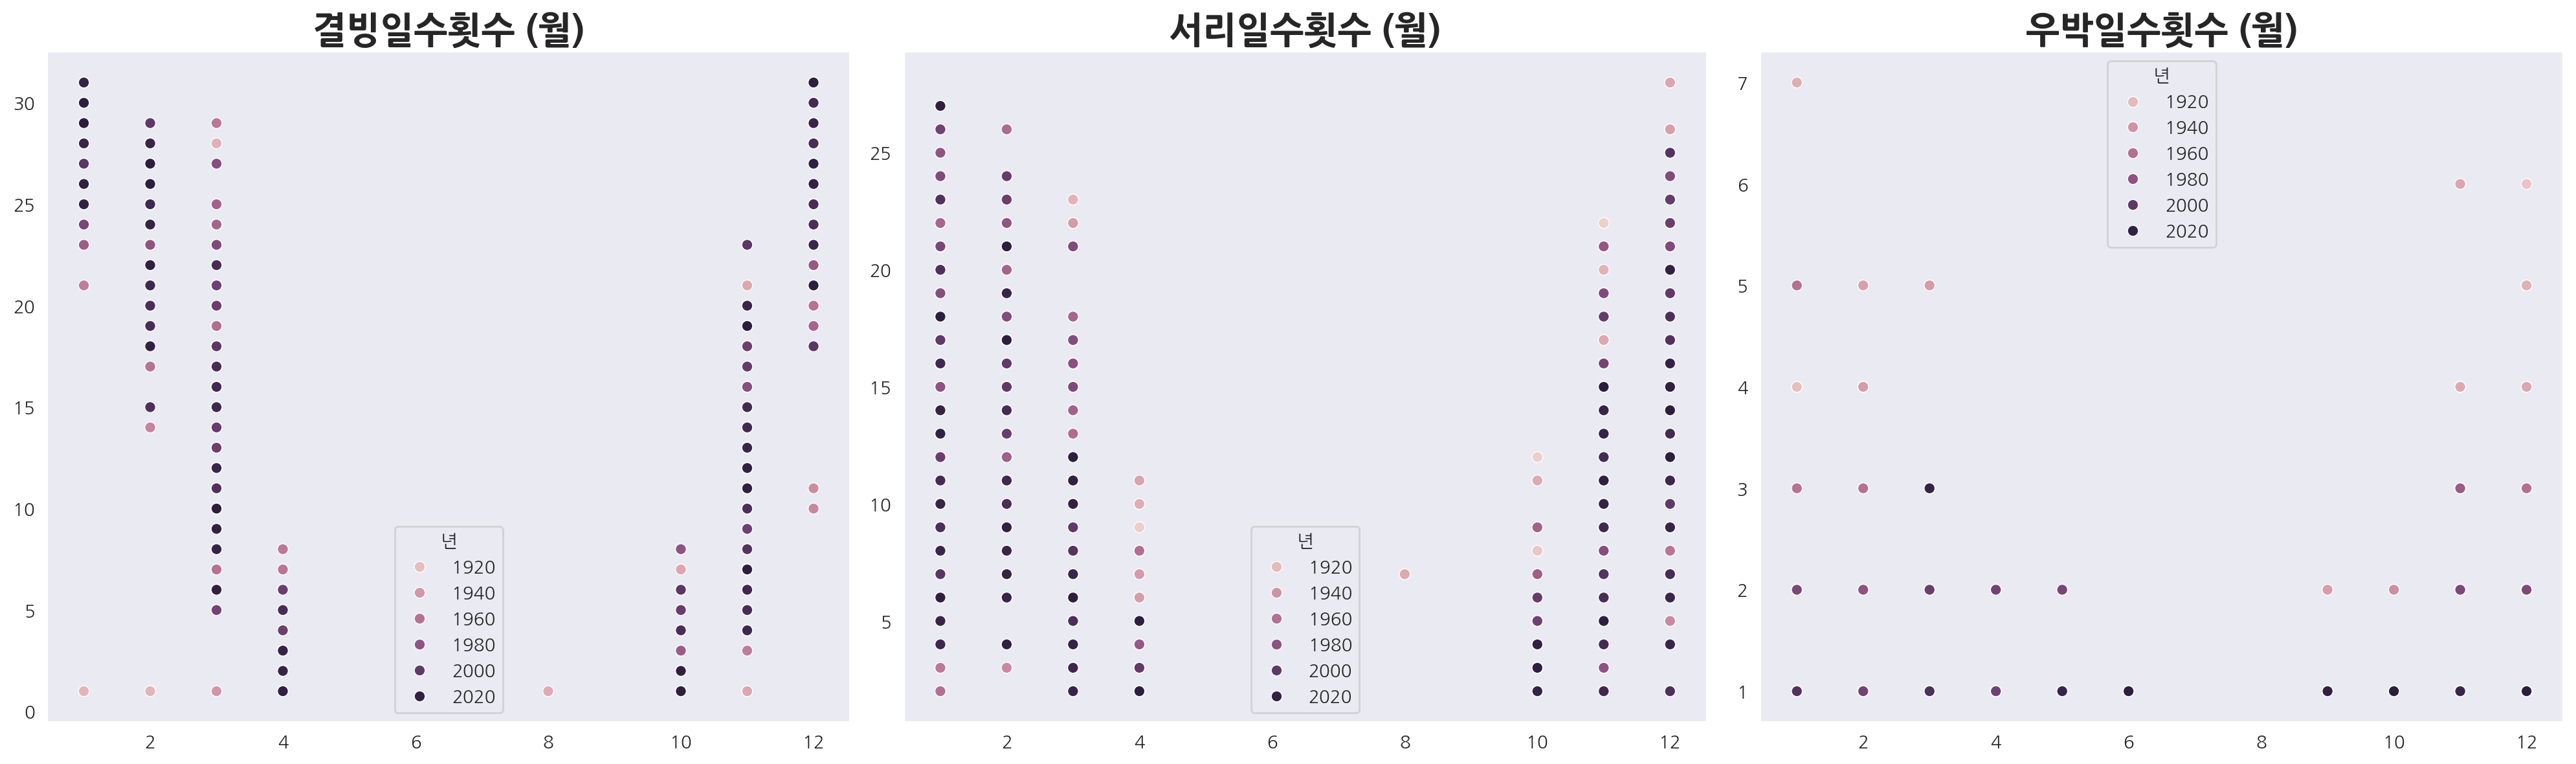

In [65]:
# 날시가 점점 따뜻해질수록 결빙일수 감소의 폭이 증가하는 것을 확인해볼 수 있다.
# 횟수가 포함된 3개의 데이터 리스트
def interpret_line(axx):
    if len(axx.get_lines()) > 0:
        slope, intercept, r, p, sterr = scipy.stats.linregress(
            x=axx.get_lines()[0].get_xdata(),
            y=axx.get_lines()[0].get_ydata()
        )
        print(intercept, slope)
        return "{}x + {}".format(round(slope, 3), round(intercept, 3))
    else:
        return "없음"

fig, ax = plt.subplots(1, 3, dpi=200, figsize=(20, 6))

for idx, target in enumerate(['결빙일수횟수', '서리일수횟수', '우박일수횟수']):
    # sns.set_theme()
    facet = sns.scatterplot(
        data=basedf[(basedf[target] > np.percentile(basedf[target], 50))],
        x='월',
        y=target,
        hue="년",
        # height=4,
        # x_estimator=np.mean,
        # line_kws={"color": "C3"},
        # alpha = 0.5,
        # col_wrap=2,
        # ci=100,
        # fit_reg=True,
        # scatter=True,
        ax = ax[idx]

    )

    # facet.fig.subplots_adjust(top=0.9)
    # facet.fig.suptitle(f'{target}', fontsize=20, fontweight='bold')
    # for x in facet.facet_data():
    #     tmpax = facet.facet_axis(0, x[0][1])
    #     formula = interpret_line(tmpax)
    #     tmpax.set_title(tmpax.get_title().split('=')[-1] + "월 " + f'{target}(년)')
    #     tmpax.set_xlabel("")
    #     tmpax.legend(['횟수', formula])
    #     # result = ax.facet_axis(*x)
    #     # print(result)
    # plt.savefig(target + '.png', dpi=200)
    ax[idx].set_title(f"{target} (월)", fontdict={'weight':'bold', 'size':'20'})
    ax[idx].set_xlabel("")
    ax[idx].set_ylabel("")
    # plt.xlabel("")
    # plt.ylabel("")
    # plt.show()


plt.tight_layout()
plt.savefig('scatter.png', dpi=200)
plt.show()
plt.close()

    


In [30]:
# 날시가 점점 따뜻해질수록 결빙일수 감소의 폭이 증가하는 것을 확인해볼 수 있다.
# 횟수가 포함된 3개의 데이터 리스트
def interpret_line(axx):
    if len(axx.get_lines()) > 0:
        slope, intercept, r, p, sterr = scipy.stats.linregress(
            x=axx.get_lines()[0].get_xdata(),
            y=axx.get_lines()[0].get_ydata()
        )
        print(intercept, slope)
        return "{}x + {}".format(round(slope, 3), round(intercept, 3))
    else:
        return "없음"

## 봄, 여름 가을 겨울 basedf 에 추가하기


for target in ['결빙일수횟수', '서리일수횟수', '우박일수횟수']:
    # sns.set_theme()
    facet = sns.scatterplot(
        data=basedf[(basedf[target] > np.percentile(basedf[target], 50))],
        x='최저기온(°C)',
        y=target,
        hue="월",
        # height=4,
        # x_estimator=np.mean,
        # line_kws={"color": "C3"},
        alpha=0.5,
        # palette=dict(setosa="#9b59b6", virginica="#3498db", versicolor="#95a5a6"),
        # col_wrap=2,
        # ci=100,
        # fit_reg=True,
        # scatter=True,

    )

    # facet.fig.subplots_adjust(top=0.9)
    # facet.fig.suptitle(f'{target}', fontsize=20, fontweight='bold')
    # for x in facet.facet_data():
    #     tmpax = facet.facet_axis(0, x[0][1])
    #     formula = interpret_line(tmpax)
    #     tmpax.set_title(tmpax.get_title().split('=')[-1] + "월 " + f'{target}(년)')
    #     tmpax.set_xlabel("")
    #     tmpax.legend(['횟수', formula])
    #     # result = ax.facet_axis(*x)
    #     # print(result)
    # plt.savefig(target + '.png', dpi=200)
    plt.title(f"{target} (월)")
    plt.xlabel("")
    plt.ylabel("")
    plt.show()
    


ValueError: The palette dictionary is missing keys: {1, 2, 3, 4, 8, 10, 11, 12}

In [ ]:
sns.heatmap(data = basedf.corr(), annot=True, cmap='coolwarm')